# Uppgift 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


df = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Veckodata Riket")
df.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


## perfomed varius information gathering

- info()
- describe()
- value_counts()
- head()
- columns
- index

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              143 non-null    int64  
 1   veckonummer                     143 non-null    int64  
 2   Antal_fall_vecka                143 non-null    int64  
 3   Antal_fall_100000inv_vecka      143 non-null    int64  
 4   Antal_fall_100000inv_14dagar    143 non-null    int64  
 5   Kum_antal_fall                  143 non-null    int64  
 6   Kum_fall_100000inv              143 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  143 non-null    int64  
 8   Kum_antal_intensivvårdade       143 non-null    int64  
 9   Antal_avlidna_vecka             143 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    143 non-null    float64
 11  Kum_antal_avlidna               143 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      143 

## create new column vecka

In [3]:
# created new column named "vecka" with format string "år/v/vecka"
# unsure if this new column was meant to replace the old ones but thought it was better to add more information rather than replacing existing i keept them
df["vecka"] = df["år"].astype(str) + "v" + df["veckonummer"].astype(str)
df["vecka"]

0       2020v6
1       2020v7
2       2020v8
3       2020v9
4      2020v10
        ...   
138    2022v39
139    2022v40
140    2022v41
141    2022v42
142    2022v43
Name: vecka, Length: 143, dtype: object

In [4]:
df["Antal_avlidna_vecka"]

0       0
1       0
2       0
3       0
4       0
       ..
138    94
139    98
140    94
141    70
142    37
Name: Antal_avlidna_vecka, Length: 143, dtype: int64

## Graphs of deaths per week

In [5]:
fig = px.line(df, x = "vecka", y = "Antal_avlidna_vecka", title= "Dödsfall per vecka")
fig.update_xaxes(title_text = "Vecka")
fig.update_yaxes(title_text = "Dödsfall")
fig.show()
fig.write_html("Visualiseringar/Dödsfall_per_vecka.html")

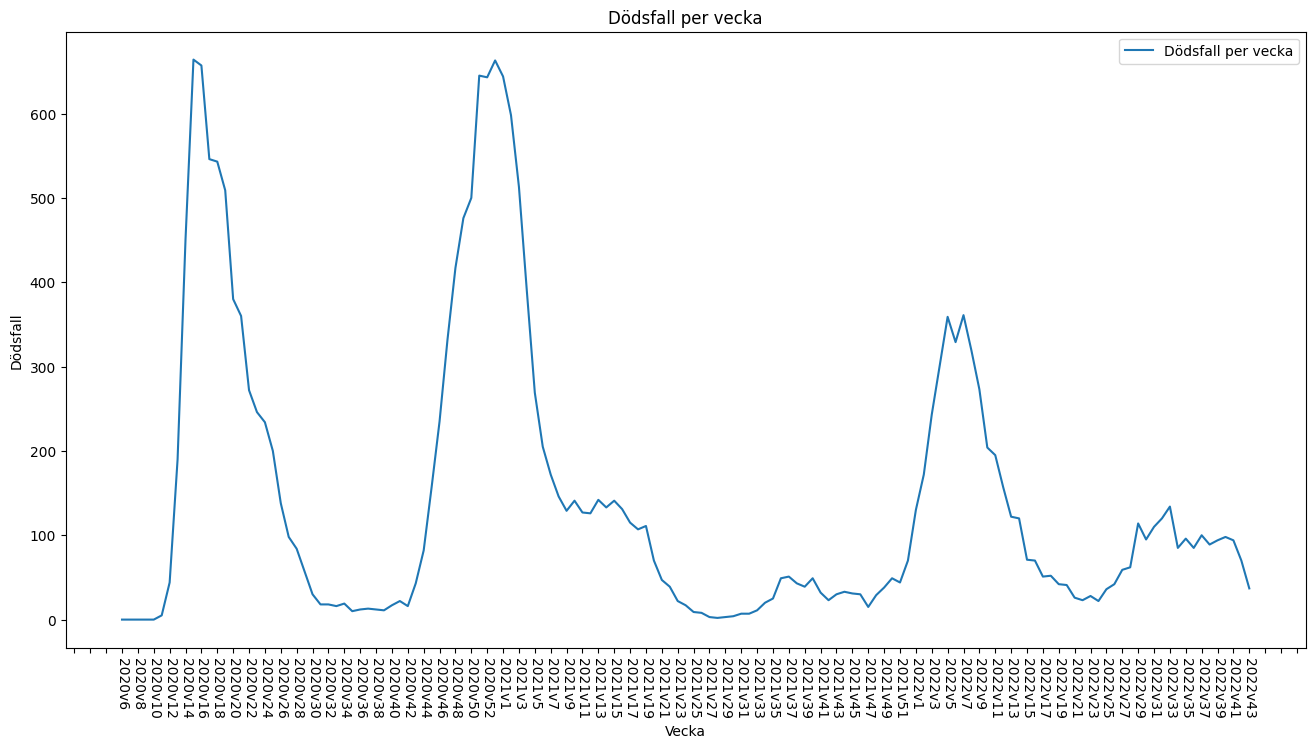

In [6]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.lineplot(data = df, x = "vecka", y = "Antal_avlidna_vecka", label = "Dödsfall per vecka")
plt.xticks(rotation=-90)
ax.set(xlabel="Vecka", ylabel="Dödsfall", title="Dödsfall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
plt.savefig("Visualiseringar/Dödsfall_per_vecka.png")

## Graphs of new cases per week

In [7]:
fig = px.line(df, x = "vecka", y = "Antal_fall_vecka", title= "Nya fall per vecka")
fig.update_xaxes(title_text = "Vecka")
fig.update_yaxes(title_text = "Antal fall")
fig.show()
fig.write_html("Visualiseringar/Nya_fall_per_vecka.html")

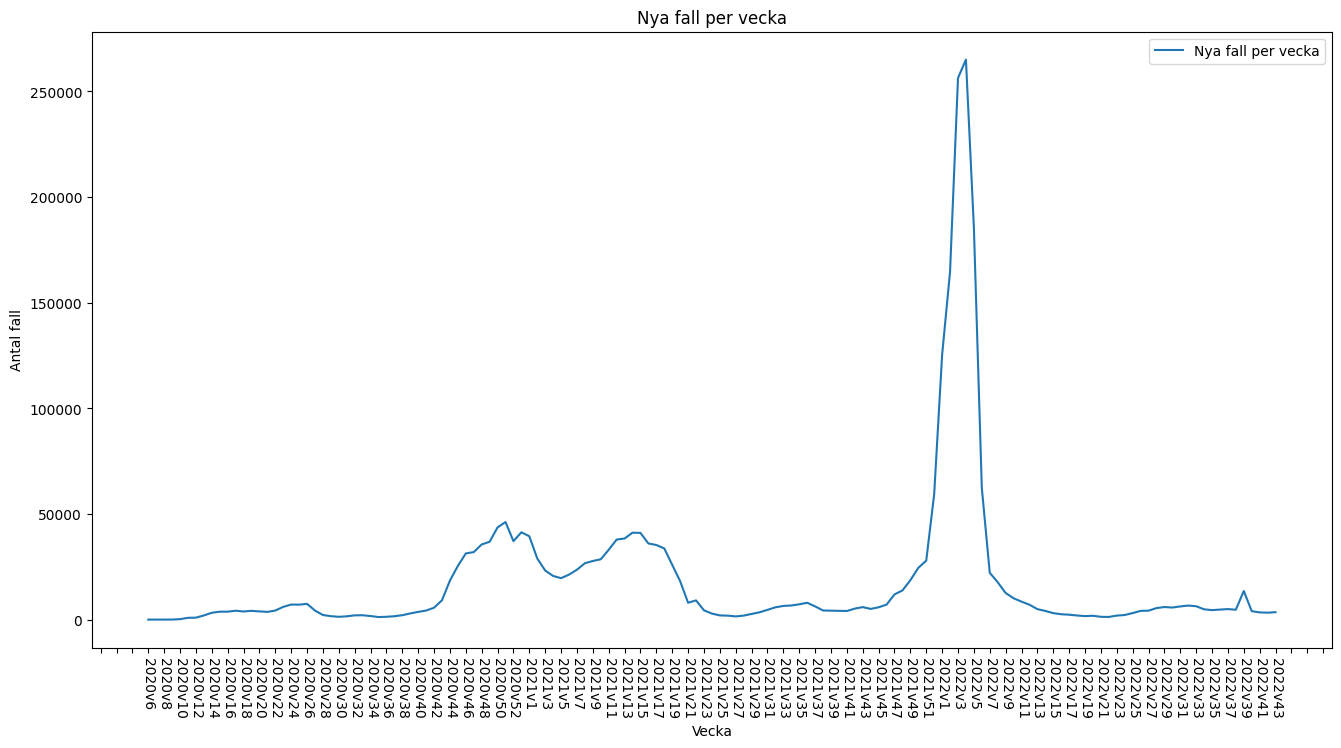

In [8]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.lineplot(data = df, x = "vecka", y = "Antal_fall_vecka", label = "Nya fall per vecka")
plt.xticks(rotation=-90)
ax.set(xlabel="Vecka", ylabel="Antal fall", title="Nya fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
plt.savefig("Visualiseringar/Nya_fall_per_vecka.png")

## Graph of new cases and deaths per week

In [14]:
# got tips from classmates to use a log scale so that the correlation between graphs was visible
fig = px.line(df, x = "vecka", y = ["Antal_avlidna_vecka","Antal_fall_vecka"], title= "Antal nya fall/dödsfall per vecka", log_y=True)
fig.update_xaxes(title_text = "Vecka")
fig.update_yaxes(title_text = "Antal")
fig.show()
fig.write_html("Visualiseringar/Antal_fall_och_döda_per_vecka.html")

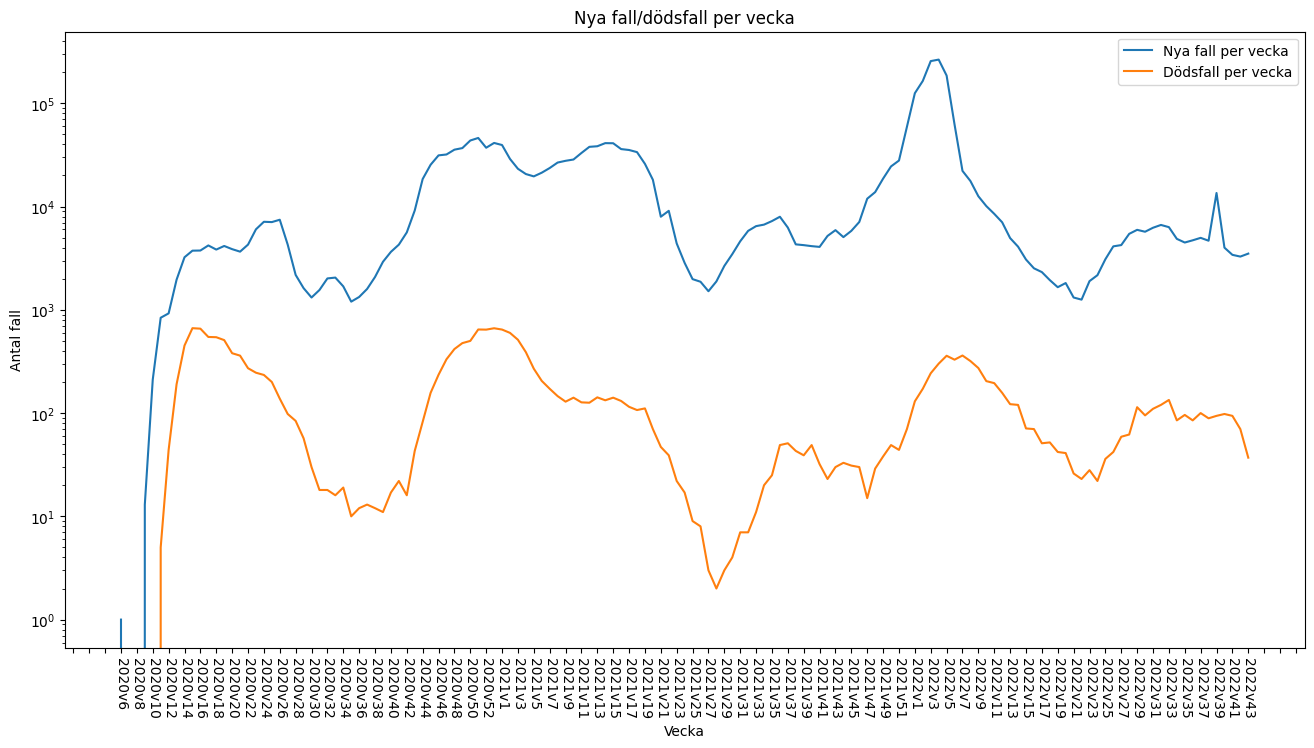

In [15]:
fig, ax = plt.subplots(figsize = (16,8))
ax1 = sns.lineplot(data = df, x = "vecka", y = "Antal_fall_vecka", label = "Nya fall per vecka")
ax2 = sns.lineplot(data = df, x = "vecka", y = "Antal_avlidna_vecka", label = "Dödsfall per vecka")
plt.xticks(rotation=-90)
ax.set(xlabel="Vecka", ylabel="Antal fall", title="Nya fall/dödsfall per vecka")
ax1.set_yscale("log")
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
plt.savefig("Visualiseringar/Antal_fall_och_döda_per_vecka.png")

## Cumulative total cases

In [17]:
fig = px.line(df, x = "vecka", y = "Kum_antal_fall", title= "kumulativt fall per vecka")
fig.update_xaxes(title_text = "Vecka")
fig.update_yaxes(title_text = "Antal fall")
fig.show()
fig.write_html("Visualiseringar/Kumulativt_antal_fall.html")

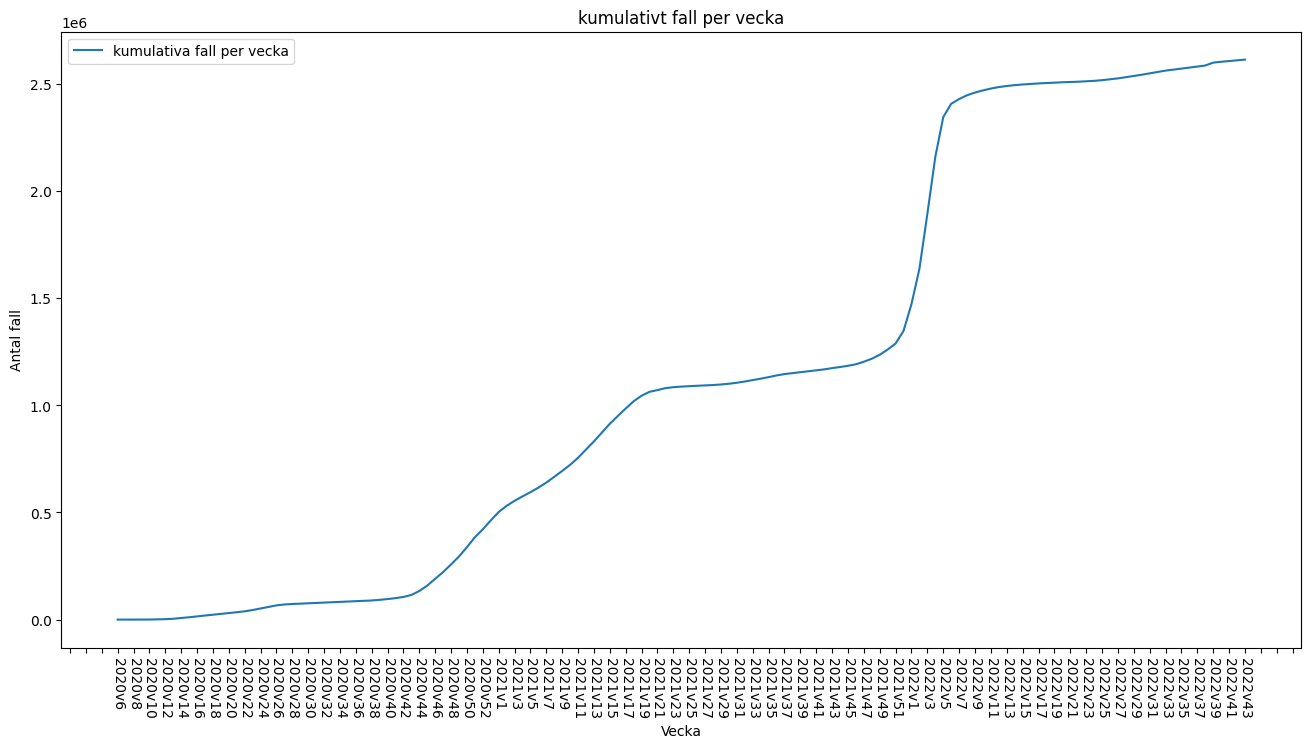

In [16]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.lineplot(data = df, x = "vecka", y = "Kum_antal_fall", label = "kumulativa fall per vecka")
plt.xticks(rotation=-90)
ax.set(xlabel="Vecka", ylabel="Antal fall", title="kumulativt fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
plt.savefig("Visualiseringar/Kumulativt_antal_fall.png")

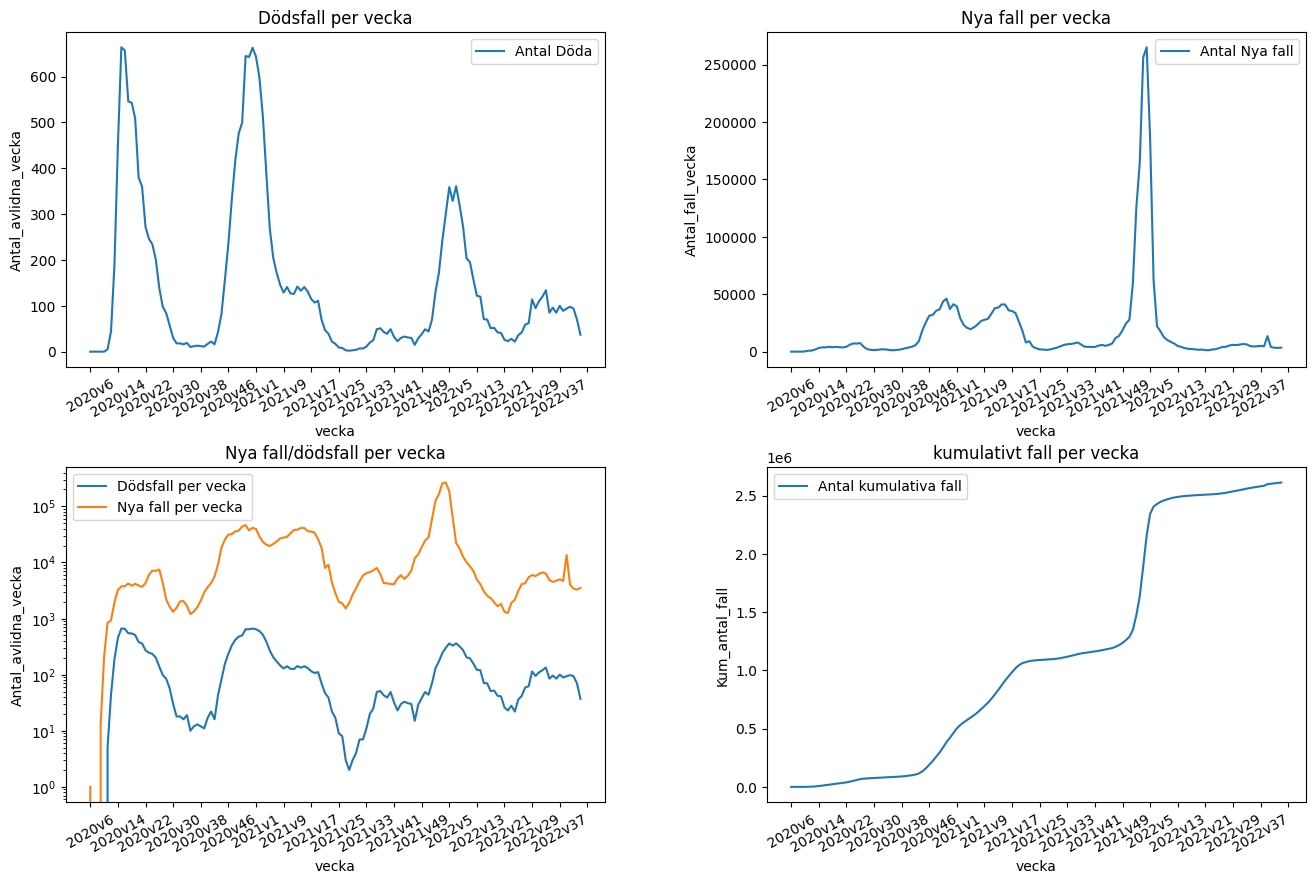

In [36]:
# 2 x 2 subplot for all graphs
subfig, axes = plt.subplots(2 , 2, figsize=(16,10))

# titles , y values and labels to iterate 
y_names = ["Antal_avlidna_vecka", "Antal_fall_vecka", "Antal_avlidna_vecka", "Kum_antal_fall"]
titles = ["Dödsfall per vecka", "Nya fall per vecka", "Nya fall/dödsfall per vecka", "kumulativt fall per vecka"]
labels = ["Antal Döda", "Antal Nya fall", "Dödsfall per vecka", "Antal kumulativa fall"]

# alter space between plots
subfig.subplots_adjust(wspace=0.3, hspace=0.3)

# loops trough all subplots and lists of plot data (y values, titles, labels)
for ax, y_name, title, label in zip(axes.flatten(), y_names, titles, labels):

    fig = sns.lineplot(ax = ax, data = df, x = "vecka", y = y_name, label = label)

    fig.set(title = title)
    
    # special to ad second line on fig and make it logarithmic
    if title == titles[2]:
        sns.lineplot(ax = axes[1, 0] ,data = df, x = "vecka", y = "Antal_fall_vecka", label = "Nya fall per vecka")
        ax.set(yscale="log")

    #makes x values readable 
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.tick_params(axis="x", rotation = 30)

subfig.savefig("Visualiseringar/Alla_grafer.png")